In [388]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('../data/RFID_DATA_SET200.csv')
df.fillna(0)
# normalize data
ID = df['ID'].values
le = LabelEncoder()
id_encoded = le.fit_transform(np.ravel(ID))    # warn
df['ID'] = id_encoded


In [389]:
dataset = df

X = dataset['DISTANCE'].to_frame()
y = dataset['READ_RATE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(x_poly, y_train)

LinearRegression()

In [390]:
y_pred = lin.predict(poly.fit_transform(X_test))
print(y_pred)

scores = cross_val_score(lin, X, y, cv=10, scoring='r2')
print(scores)
print("Means Absolute Error")
print(metrics.mean_absolute_error(y_test, y_pred))
print("Means Square Error")
print(metrics.mean_squared_error(y_test, y_pred))
print("All R2 Scores")
print(scores)
print("Mean R2 Score")
print(scores.mean())

[ -2.38033752  98.22609459  -2.38033752  98.22609459   3.2419317
  45.26822419  55.62668042  -0.72358417  55.62668042  45.26822419
 101.61126295 101.61126295  -0.72358417  45.26822419   3.2419317
  65.80735424  -2.38033752  35.08720628  16.67836817 103.2656077
  75.45502498   9.16098938  84.21447192  25.43884737   9.16098938
  75.45502498 102.25562514  55.62668042  -2.38033752  -2.38033752
  97.6478116   16.67836817  25.43884737  -0.72358417  -0.72358417
  45.26822419 103.2656077  102.25562514 102.25562514  -1.37310766
  91.73047436  25.43884737  35.08720628  75.45502498  45.26822419
   3.2419317   75.45502498 102.25562514  65.80735424  98.22609459
   9.16098938  65.80735424  84.21447192 103.2656077   25.43884737
  25.43884737  84.21447192  25.43884737   9.16098938  90.82179533
  -0.72358417  90.82179533  55.62668042  98.22609459  -1.37310766
   9.16098938 101.61126295  -2.38033752  98.22609459  97.6478116
  45.26822419  98.22609459  98.22609459  98.22609459  98.22609459
 101.61126295 

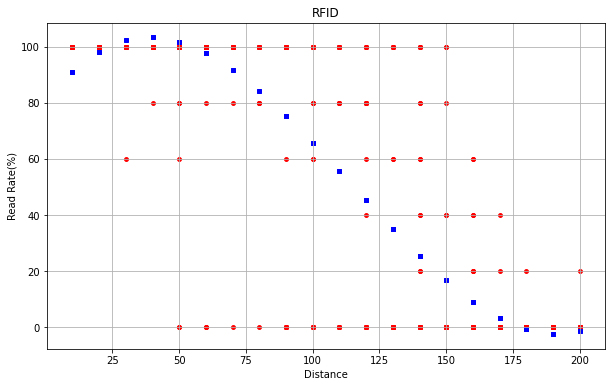

In [391]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='red', s=15)
plt.scatter(X_test, y_pred, color='blue', s=15)
plt.title("RFID")
plt.xlabel("Distance")
plt.ylabel("Read Rate(%)")
plt.grid()
plt.show()

